A reconstruct_tree function that takes a Prüfer code list and returns the corresponding tree's edge list.

In [1]:
import heapq
from typing import List, Tuple

import networkx as nx
import matplotlib.pyplot as plt


In [2]:
def reconstruct_tree(pruefer_code: List[int]) -> List[Tuple[int, int]]:
    """
    Reconstructs a tree from its Prüfer code.

    Args:
        pruefer_code: List of length n-2 encoding the tree on vertices 1..n.

    Returns:
        A list of edges (u, v) representing the tree.
    """
    # Number of vertices
    n = len(pruefer_code) + 2

    # Initialize degree counts: each vertex appears once + extra for each occurrence in code
    degree = [1] * (n + 1)  # 1-based indexing; degree[0] unused
    for node in pruefer_code:
        degree[node] += 1

    # Min-heap of leaves (vertices of degree 1)
    leaves = [v for v in range(1, n + 1) if degree[v] == 1]
    heapq.heapify(leaves)

    edges: List[Tuple[int, int]] = []
    # Process each code entry
    for node in pruefer_code:
        # Get smallest leaf
        leaf = heapq.heappop(leaves)
        # Add edge between leaf and the current code node
        edges.append((leaf, node))

        # Decrement degrees
        degree[leaf] -= 1
        degree[node] -= 1

        # If node has become a leaf, add to heap
        if degree[node] == 1:
            heapq.heappush(leaves, node)

    # Two vertices remain with degree 1
    u = heapq.heappop(leaves)
    v = heapq.heappop(leaves)
    edges.append((u, v))

    return edges

Visualizes the tree given by its edge list using NetworkX and Matplotlib.

    Args:
        edges: List of (u, v) edges in the tree.
        title: Title for the plot.

In [ ]:

def visualize_tree(edges: List[Tuple[int, int]], title: str = "Reconstructed Tree"):

    G = nx.Graph()
    G.add_edges_from(edges)

    # Use a spring layout for visualization
    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=500,
        font_size=12,
        edge_color="black",
        linewidths=1,
    )
    plt.title(title)
    plt.axis('off')
    plt.show()


Reconstructed edges: [(1, 2), (3, 6), (4, 2), (5, 2), (2, 6), (6, 7)]


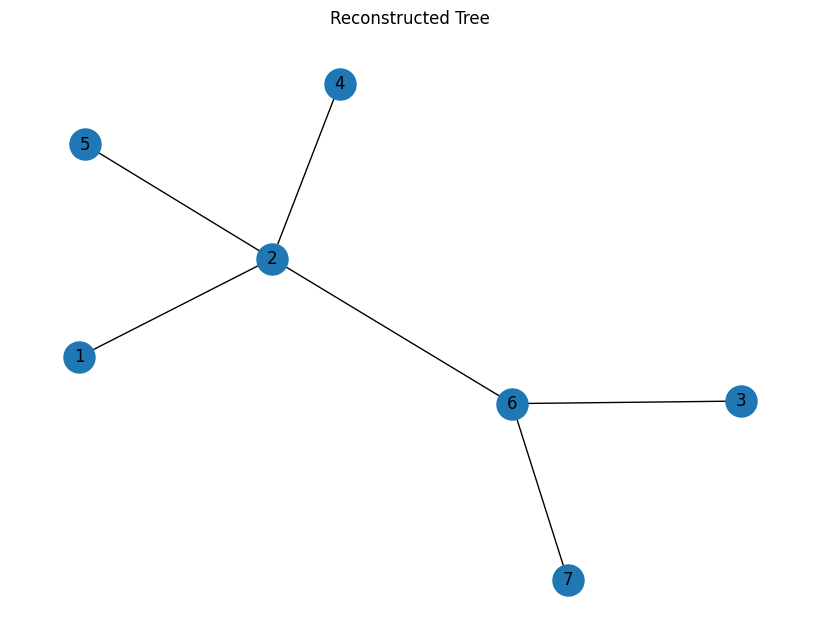

In [4]:
# Example Prüfer code
pruefer = [2,6,2,2,6]

# Reconstruct the tree
tree_edges = reconstruct_tree(pruefer)
print("Reconstructed edges:", tree_edges)

# Visualize the tree
visualize_tree(tree_edges)
